In this notebook, we will be looking at a dataset containing the number of crashes reported by precinct in Davidson County, pulled from https://data.nashville.gov/.

We will be doing some calculations using `pandas` and then visualizing the results. To assist us in working with the plots we build, we will use the `pyplot` module from the `matplotlib` library. The typical alias for this module is `plt`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

First, reading in the data.

In [2]:
crashes = pd.read_csv('../data/crashes.csv')

In [3]:
crashes.head()

,date,precinct,accident_count
0,2020-01-01,CENTRA,3
1,2020-01-01,EAST,3
2,2020-01-01,HERMIT,11
3,2020-01-01,MADISO,4
4,2020-01-01,MIDTOW,3


First, let's take a look at the total number of crashes per precinct. 

**Question:** Why can't we use `.value_counts()` for this?

To accomplish our goal, we can make use of the `.groupby()` method.

Quite often when using `.groupby()`, our goal is to calculate an aggregate value by group. To use `.groupby()`, we need to tell pandas: 
* **what** to group by
* **which** column (or columns) we want to aggregate
* **how** to aggregate

In this case, we want to group by `precinct` and then aggregate the `accident_count` column by _summing_ the counts.

In [4]:
crashes_by_precinct = crashes.groupby('precinct')['accident_count'].sum()

In [5]:
crashes_by_precinct

precinct
CENTRA    2032
EAST      2548
HERMIT    4802
MADISO    2641
MIDTOW    3646
NORTH     3167
SOUTH     6476
WEST      2851
Name: accident_count, dtype: int64

**Question:** What type of object is `crashes_by_precinct`?

In [6]:
# Your code here


We can convert the index (containing the precinct names) to a regular column by using the `.reset_index()` method. As we have seen before with pandas methods, if we want to retain the changes, we need to assign it back to itself.

In [7]:
crashes_by_precinct = crashes_by_precinct.reset_index()

In [8]:
crashes_by_precinct

,precinct,accident_count
0,CENTRA,2032
1,EAST,2548
2,HERMIT,4802
3,MADISO,2641
4,MIDTOW,3646
5,NORTH,3167
6,SOUTH,6476
7,WEST,2851


At this point, we can easily create plots from out DataFrame by using the `.plot()` method.

Notice the `;` at the end of the line. This suppresses some additional unneeded output and just shows the plot.

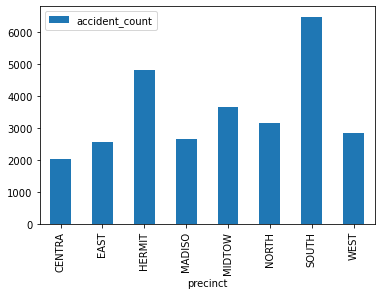

In [9]:
crashes_by_precinct.plot(kind = 'bar', x = 'precinct', y = 'accident_count');

Plots are highly customizable, either by passing in arguments into the `.plot()` method or by using functions from matplotlib (or by doing a combination of the two).

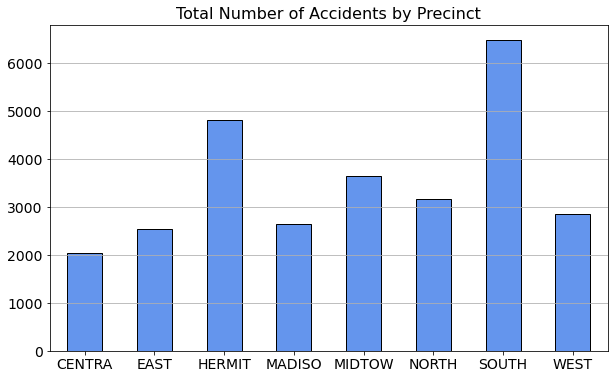

In [10]:
crashes_by_precinct.plot(kind = 'bar', 
                         x = 'precinct',
                         y = 'accident_count',
                         color = 'cornflowerblue',     # Change the fill color
                         edgecolor = 'black',          # Add a border to each bar
                         legend = False,               # Disable the legend
                         figsize = (10,6))             # Increase the size of the plot

plt.grid(axis = 'y')                                   # Add horizontal grid lines
                                             # Note that we are using functions from matplotlib from here down

plt.xticks(rotation = 0, fontsize = 14)                # Change orientation and size of x-axis tick labels
plt.yticks(fontsize = 14)                              # Change font size of y-axis tick labels
plt.xlabel('')                                         # Remove the x-axis label

plt.title('Total Number of Accidents by Precinct', fontsize = 16);      # Add a title

We might also be interested in looking at the number of accidents over time. For this, we can make use of the date column.

**Question:** What is the datatype of the Date column currently?

In [11]:
# Your Code Here


When working with datetime data, we can often make our lives easier if we convert it to the datetime data type. To do this, we can use the `to_datetime()` function from pandas.

In [12]:
pd.to_datetime(crashes['date'])

0      2020-01-01
1      2020-01-01
2      2020-01-01
3      2020-01-01
4      2020-01-01
          ...    
4007   2021-05-23
4008   2021-05-23
4009   2021-05-23
4010   2021-05-23
4011   2021-05-23
Name: date, Length: 4012, dtype: datetime64[ns]

Again, if I want to keep the changes, I need to assign the result back. Here, I just need to assign it to the column.

In [13]:
crashes['date'] = pd.to_datetime(crashes['date'])

Now, let's look at the total number of crashes (across all precincts) by day.

Use `.groupby` to find the total number of crashes per day. Be sure to reset the index and then save the result to an object named `crashes_per_day`.

In [14]:
# Your code here.

In [15]:
crashes_per_day = crashes.groupby('date')['accident_count'].sum().reset_index()

In [16]:
crashes_per_day

,date,accident_count
0,2020-01-01,44
1,2020-01-02,117
2,2020-01-03,127
3,2020-01-04,55
4,2020-01-05,41
...,...,...
504,2021-05-19,69
505,2021-05-20,50
506,2021-05-21,46
507,2021-05-22,68


Once we have aggregated the results, we can use the `.plot` method to create a line chart. 

Try and fill in the code to create a line chart from the dataframe. Hint - you can use Shift + Tab if you need to view the docstring for the `.plot()` function.

In [17]:
# Fill in the code here.

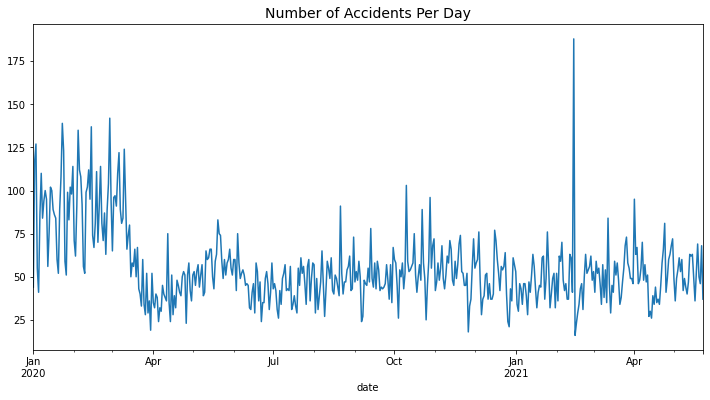

In [18]:
crashes_per_day.plot(kind = 'line',
                     x = 'date', 
                     y = 'accident_count',
                    figsize = (12,6),
                    legend = False)

plt.title('Number of Accidents Per Day', fontsize = 14);

In some instances, we might want to keep a running total of a column. The pandas library has a large number of methods that can help us do that, such as the `.cumsum()` method, for calculating cumulative sums.

Before applying any methods that are using multiple rows, it is a good idea to use the `.sort_values` method to ensure that the observations are in order.

In [19]:
crashes_per_day = crashes_per_day.sort_values(by = 'date')

In [20]:
crashes_per_day['accident_count'].cumsum()

0         44
1        161
2        288
3        343
4        384
       ...  
504    27962
505    28012
506    28058
507    28126
508    28163
Name: accident_count, Length: 509, dtype: int64

I can take the result of the above calculation and save it to a new column in my DataFrame.

In [21]:
crashes_per_day['cumulative_count'] = crashes_per_day['accident_count'].cumsum()

In [22]:
crashes_per_day.head()

,date,accident_count,cumulative_count
0,2020-01-01,44,44
1,2020-01-02,117,161
2,2020-01-03,127,288
3,2020-01-04,55,343
4,2020-01-05,41,384


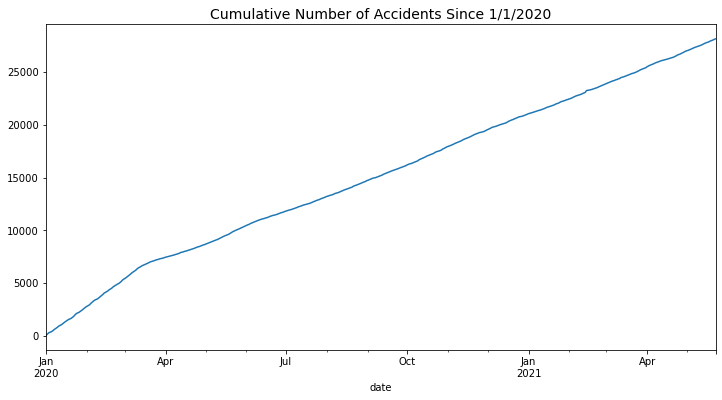

In [23]:
crashes_per_day.plot(kind = 'line',
                     x = 'date', 
                     y = 'cumulative_count',
                    figsize = (12,6),
                    legend = False)

plt.title('Cumulative Number of Accidents Since 1/1/2020', fontsize = 14);

Finally, there are times when it makes sense to smooth out some of the short-term variability and look at a moving average. 

Luckily, pandas makes this easy to do using the `.rolling` method. 

Similar to the `groupby` paradigm, you just need to specify what column to build a window off of, how large a window, which column to aggregrate, and how to aggregate it.

In [24]:
crashes_per_day['moving_average'] = crashes_per_day.rolling(window = '7d',     # 7 day window
                                           on = 'date'                         # column to build the window on
                                           )['accident_count'].mean()          # what and how to aggregate

Let's plot the moving average that we just calculated.

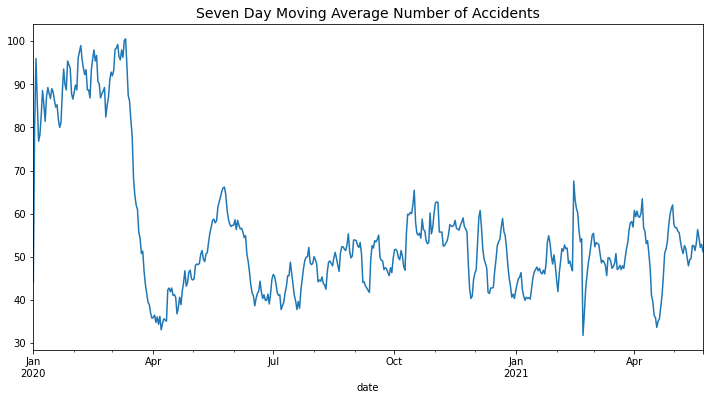

In [25]:
crashes_per_day.plot(kind = 'line',
                     x = 'date', 
                     y = 'moving_average',
                    figsize = (12,6),
                    legend = False)

plt.title('Seven Day Moving Average Number of Accidents', fontsize = 14);

Finally, we can easily place two plots on the same figure. I just need to call `.plot` twice and indicate that I want both plots to be on the same set of axes.

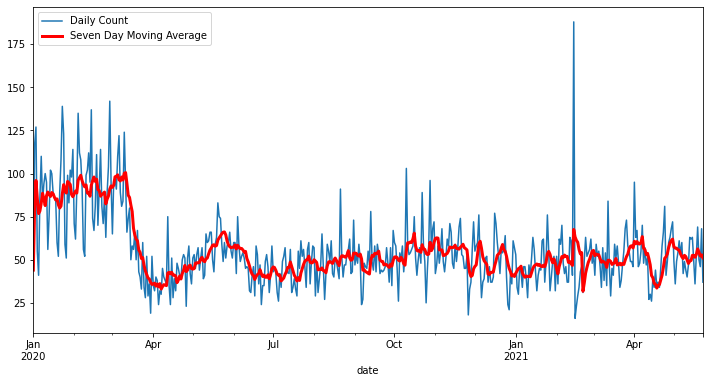

In [26]:
fig, ax = plt.subplots(figsize = (12,6))         # Create a figure and an axis object

crashes_per_day.plot(kind = 'line',
                     x = 'date', 
                     y = 'accident_count',
                     ax = ax,                    # Build this plot on the axis we created above
                     label = 'Daily Count')      # How this one should be labeled in the legend

crashes_per_day.plot(kind = 'line',
                     x = 'date', 
                     y = 'moving_average',
                     color = 'red',
                     linewidth = 3,
                     ax = ax,                               # Also place this one on the same axis from above
                     label = 'Seven Day Moving Average');   # Label for this plot in the legend